## Exploratory Data Analysis for US Flight OnTime Performance

Data of the United States Department of Transportation

The analysis is conducted under the premise to prepare a predictive analysis on the traget variable arrival delays.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from scipy.stats import chi2_contingency

In [3]:
df1 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_12.csv')
df2 = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2020_1.csv')

In [5]:
df = pd.concat([df1, df2])

In [6]:
df = df.reset_index()

In [7]:
df.shape

(1233109, 111)

In [8]:
df.head(5)

,index,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,0,2019,4,12,31,2,2019-12-31,AA,19805,AA,N957AN,1583,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41,1820,1823.0,3.0,3.0,0.0,0.0,1800-1859,20.0,1843.0,2233.0,6.0,2244,2239.0,-5.0,0.0,0.0,-1.0,2200-2259,0.0,NaN,0.0,204.0,196.0,170.0,1.0,1440.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2019,4,12,1,7,2019-12-01,AA,19805,AA,N914AN,1584,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1235,1314.0,39.0,39.0,1.0,2.0,1200-1259,11.0,1325.0,1401.0,10.0,1344,1411.0,27.0,27.0,1.0,1.0,1300-1359,0.0,NaN,0.0,69.0,57.0,36.0,1.0,190.0,1,6.0,0.0,0.0,0.0,21.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2019,4,12,4,3,2019-12-04,AA,19805,AA,N926AN,1584,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1240,1234.0,-6.0,0.0,0.0,-1.0,1200-1259,14.0,1248.0,1326.0,10.0,1348,1336.0,-12.0,0.0,0.0,-1.0,1300-1359,0.0,NaN,0.0,68.0,62.0,38.0,1.0,190.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2019,4,12,5,4,2019-12-05,AA,19805,AA,N930AN,1584,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1240,1236.0,-4.0,0.0,0.0,-1.0,1200-1259,14.0,1250.0,1333.0,13.0,1348,1346.0,-2.0,0.0,0.0,-1.0,1300-1359,0.0,NaN,0.0,68.0,70.0,43.0,1.0,190.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2019,4,12,6,5,2019-12-06,AA,19805,AA,N974AN,1584,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,1240,1531.0,171.0,171.0,1.0,11.0,1200-1259,13.0,1544.0,1617.0,7.0,1348,1624.0,156.0,156.0,1.0,10.0,1300-1359,0.0,NaN,0.0,68.0,53.0,33.0,1.0,190.0,1,153.0,0.0,0.0,0.0,3.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233109 entries, 0 to 1233108
Data columns (total 111 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   index                            int64  
 1   Year                             int64  
 2   Quarter                          int64  
 3   Month                            int64  
 4   DayofMonth                       int64  
 5   DayOfWeek                        int64  
 6   FlightDate                       object 
 7   Reporting_Airline                object 
 8   DOT_ID_Reporting_Airline         int64  
 9   IATA_CODE_Reporting_Airline      object 
 10  Tail_Number                      object 
 11  Flight_Number_Reporting_Airline  int64  
 12  OriginAirportID                  int64  
 13  OriginAirportSeqID               int64  
 14  OriginCityMarketID               int64  
 15  Origin                           object 
 16  OriginCityName                   object 
 17  OriginS

In [8]:
print('Number of delayed arrivals: ', df['ArrDel15'][(df['ArrDel15']==1)].count(), 'Number of delayed departures: ', df['DepDel15'][(df['DepDel15']==1)].count())

Number of delayed arrivals:  209230 Number of delayed departures:  210041


About 17.5% of the flights are delayed on arrival.

#### Select possible predictors of arrival delay

- DayOfWeek
- ReportingAirline
- Origin
- Dest
- DepTime
- DepDelayMinutes
- DepDel15
- ArrTime
- ArrDelayMinutes
- ArrDel5
- Cancelled
- Diverted
- AirTime
- Distance
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay
- TotalAddGTime
- DivAirportLandings
- DivReachedDest
- DivArrDelay

In [69]:
df = df[['DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'DepTime', 'DepDelayMinutes', 'DepDel15','ArrTime','ArrDelayMinutes', 'ArrDel15', 'Cancelled', 'Diverted', 'AirTime','Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'TotalAddGTime','DivAirportLandings', 'DivReachedDest', 'DivArrDelay']]

### Missing value analysis and treatment

In [10]:
df.isnull().sum()

DayOfWeek                   0
Reporting_Airline           0
Origin                      0
Dest                        0
DepTime                 12174
DepDelayMinutes         12209
DepDel15                12209
ArrTime                 13120
ArrDelayMinutes         15229
ArrDel15                15229
Cancelled                   0
Diverted                    0
AirTime                 15229
Distance                    0
CarrierDelay          1023879
WeatherDelay          1023879
NASDelay              1023879
SecurityDelay         1023879
LateAircraftDelay     1023879
TotalAddGTime         1225494
DivAirportLandings         85
DivReachedDest        1230601
DivArrDelay           1231000
dtype: int64

In [11]:
df.loc[pd.isnull(df['DepDel15'])].head(10)

,index,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
2655,2655,2019,4,12,1,7,2019-12-01,AA,19805,AA,N562UW,1665,12889,1288903,32211,LAS,"Las Vegas, NV",NV,32,Nevada,85,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,609,NaN,NaN,NaN,NaN,NaN,0600-0659,NaN,NaN,NaN,NaN,1324,NaN,NaN,NaN,NaN,NaN,1300-1359,1.0,B,0.0,255.0,NaN,NaN,1.0,1916.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2709,2709,2019,4,12,19,4,2019-12-19,AA,19805,AA,N996AN,1667,14747,1474703,30559,SEA,"Seattle, WA",WA,53,Washington,93,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,727,NaN,NaN,NaN,NaN,NaN,0700-0759,NaN,NaN,NaN,NaN,1322,NaN,NaN,NaN,NaN,NaN,1300-1359,1.0,A,0.0,235.0,NaN,NaN,1.0,1660.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2938,2938,2019,4,12,1,7,2019-12-01,AA,19805,AA,N150UW,1674,12892,1289208,32575,LAX,"Los Angeles, CA",CA,6,California,91,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1128,NaN,NaN,NaN,NaN,NaN,1100-1159,NaN,NaN,NaN,NaN,1908,NaN,NaN,NaN,NaN,NaN,1900-1959,1.0,A,0.0,280.0,NaN,NaN,1.0,2125.0,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3357,3357,2019,4,12,2,1,2019-12-02,AA,19805,AA,N601AW,1688,13891,1389101,32575,ONT,"Ontario, CA",CA,6,California,91,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81,600,NaN,NaN,NaN,NaN,NaN,0600-0659,NaN,NaN,NaN,NaN,815,NaN,NaN,NaN,NaN,NaN,0800-0859,1.0,A,0.0,75.0,NaN,NaN,1.0,325.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3552,3552,2019,4,12,28,6,2019-12-28,AA,19805,AA,N989AU,1694,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82,1721,NaN,NaN,NaN,NaN,NaN,1700-1759,NaN,NaN,NaN,NaN,1833,NaN,NaN,NaN,NaN,NaN,1800-1859,1.0,B,0.0,132.0,NaN,NaN,1.0,641.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

The missing values in the columns DepDel15 and DepDelMinutes are connected to cancelled flights. Cancelled flights are not relevant for delay analysis. The corresponding data points will be dropped.

In [12]:
df = df.loc[df['Cancelled']==0.0]

In [13]:
df.loc[pd.notnull(df['DivArrDelay']), 'DivArrDelay'].count()

2109

In [13]:
df[(pd.isnull(df['ArrDelayMinutes']))].head(10)

,index,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
202,202,2019,4,12,30,1,2019-12-30,AA,19805,AA,N934AN,1590,11042,1104205,30647,CLE,"Cleveland, OH",OH,39,Ohio,44,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,726,819.0,53.0,53.0,1.0,3.0,0700-0759,14.0,833.0,2017.0,6.0,948,2023.0,NaN,NaN,NaN,NaN,0900-0959,0.0,NaN,1.0,202.0,NaN,NaN,1.0,1021.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,784.0,635.0,0.0,STL,15016.0,1501606.0,854.0,30.0,26.0,1844.0,N934AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,347,2019,4,12,8,7,2019-12-08,AA,19805,AA,N993NN,1597,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,559,600.0,1.0,1.0,0.0,0.0,0001-0559,11.0,611.0,1017.0,21.0,906,1038.0,NaN,NaN,NaN,NaN,0900-0959,0.0,NaN,1.0,247.0,NaN,NaN,1.0,1389.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,338.0,92.0,0.0,BNA,10693.0,1069302.0,717.0,88.0,88.0,845.0,N993NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,966,2019,4,12,12,4,2019-12-12,AA,19805,AA,N892NN,1615,13931,1393102,33667,ORF,"Norfolk, VA",VA,51,Virginia,38,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,700,658.0,-2.0,0.0,0.0,-1.0,0700-0759,14.0,712.0,1017.0,16.0,946,1033.0,NaN,NaN,NaN,NaN,0900-0959,0.0,NaN,1.0,226.0,NaN,NaN,1.0,1212.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,275.0,47.0,0.0,BNA,10693.0,1069302.0,743.0,57.0,57.0,840.0,N892NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,1104,2019,4,12,17,2,2019-12-17,AA,19805,AA,N928NN,1619,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1527,1529.0,2.0,2.0,0.0,0.0,1500-1559,13.0,1542.0,2115.0,4.0,1847,2119.0,NaN,NaN,NaN,NaN,1800-1859,0.0,NaN,1.0,140.0,NaN,NaN,1.0,929.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,290.0,152.0,0.0,JAX,12451.0,1245102.0,1928.0,67.0,67.0,2035.0,N928NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,1892,2019,4,12,28,6,2019-12-28,AA,19805,AA,N122US,1640,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,10693,1069302,30693,BNA,"Nashville, TN",TN,47,Tennessee,54,2121,2138.0,17.0,17.0,1.0,1.0,2100-2159,17.0,2155.0,249.0,5.0,2245,254.0,NaN,NaN,NaN,NaN,2200-2259,0.0,NaN,1.0,1

The missing values with the variables ArrDelayMinutes and ArrDel15 are apparent with diverted flights. These flights do partly arrive with delay at the planned destination. In this case the information in the column DivArrDelay can be transferred into the ArrDelayMinutes and ArrDel15 columns.

In [14]:
df.loc[pd.notnull(df['DivArrDelay']), 'ArrDelayMinutes'] = df.loc[pd.notnull(df['DivArrDelay']), 'DivArrDelay']
df.loc[pd.notnull(df['DivArrDelay']), 'ArrDel15'] = 1.0

In [15]:
df.loc[(df['ArrDelayMinutes']<0), 'ArrDelayMinutes']=0

In [16]:
df = df.loc[pd.notnull(df['ArrTime'])]

In [17]:
df[(pd.isnull(df['AirTime']))].head(10)

,index,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
202,202,2019,4,12,30,1,2019-12-30,AA,19805,AA,N934AN,1590,11042,1104205,30647,CLE,"Cleveland, OH",OH,39,Ohio,44,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,726,819.0,53.0,53.0,1.0,3.0,0700-0759,14.0,833.0,2017.0,6.0,948,2023.0,NaN,635.0,1.0,NaN,0900-0959,0.0,NaN,1.0,202.0,NaN,NaN,1.0,1021.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,784.0,635.0,0.0,STL,15016.0,1501606.0,854.0,30.0,26.0,1844.0,N934AN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,347,2019,4,12,8,7,2019-12-08,AA,19805,AA,N993NN,1597,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,559,600.0,1.0,1.0,0.0,0.0,0001-0559,11.0,611.0,1017.0,21.0,906,1038.0,NaN,92.0,1.0,NaN,0900-0959,0.0,NaN,1.0,247.0,NaN,NaN,1.0,1389.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,338.0,92.0,0.0,BNA,10693.0,1069302.0,717.0,88.0,88.0,845.0,N993NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
966,966,2019,4,12,12,4,2019-12-12,AA,19805,AA,N892NN,1615,13931,1393102,33667,ORF,"Norfolk, VA",VA,51,Virginia,38,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,700,658.0,-2.0,0.0,0.0,-1.0,0700-0759,14.0,712.0,1017.0,16.0,946,1033.0,NaN,47.0,1.0,NaN,0900-0959,0.0,NaN,1.0,226.0,NaN,NaN,1.0,1212.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,275.0,47.0,0.0,BNA,10693.0,1069302.0,743.0,57.0,57.0,840.0,N892NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1104,1104,2019,4,12,17,2,2019-12-17,AA,19805,AA,N928NN,1619,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1527,1529.0,2.0,2.0,0.0,0.0,1500-1559,13.0,1542.0,2115.0,4.0,1847,2119.0,NaN,152.0,1.0,NaN,1800-1859,0.0,NaN,1.0,140.0,NaN,NaN,1.0,929.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,290.0,152.0,0.0,JAX,12451.0,1245102.0,1928.0,67.0,67.0,2035.0,N928NN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,1892,2019,4,12,28,6,2019-12-28,AA,19805,AA,N122US,1640,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,10693,1069302,30693,BNA,"Nashville, TN",TN,47,Tennessee,54,2121,2138.0,17.0,17.0,1.0,1.0,2100-2159,17.0,2155.0,249.0,5.0,2245,254.0,NaN,249.0,1.0,NaN,2200-2259,0.0,N

The missing values in the variable 'AirTime' are apparent with the same diverted flights that reached destination. These could be imputed with the difference between departure and arrival time.

In [74]:
Times = np.array([df['DepTime'], df['ArrTime']]).T
Arr = np.array(df['ArrTime'])
Dep = np.array(df['DepTime'])
Time_Elapsed=np.zeros((Times.shape[0], 1))
for i in range(Times.shape[0]):
    if np.diff(Times[i]) > 0:
        Time_Elapsed[i] = np.diff(Times[i])/100 *60
    else:
        Time_Elapsed[i] = (2400 - Dep[i] + Arr[i])/100*60

In [75]:
df['Time_Elapsed'] = Time_Elapsed

In [76]:
df.loc[pd.isnull(df['AirTime']), 'AirTime'] = df['Time_Elapsed']

In [14]:
np.mean(np.abs(df['AirTime']-df['Time_Elapsed'])), np.mean(df['AirTime']), np.std(df['AirTime'])

(58.820311658548626, 113.2525057193139, 72.3817734677887)

This deviation might be reduced with timezone taken into account.

In [23]:
df['ArrDel15'][(pd.isnull(df['CarrierDelay']))][(df['ArrDel15']==0)].count()

1008650

In [24]:
df['ArrDel15'][(pd.isnull(df['CarrierDelay']))][(df['ArrDel15']==1)].count()

2109

The missing values in the specific time information on delay causes is apparent when there are no delays. Thus in this case an imputation with zero is reasonable. 

The 2109 further missing values stem from the imputation of variables ArrDel15, ArrDelayMinutes and AirTime from the diverted flights.

As there is the information, that these delays stem from diverted flights, a new feature for this cause of delay 'DivertedDelay' will be created.

In [77]:
df['DivertedDelay'] = df['DivArrDelay']
m = (pd.isnull(df['DivertedDelay']))
df.loc[m, 'DivertedDelay'] = 0
df.loc[(df['DivertedDelay']<0), 'DivertedDelay']=0

In [78]:
features = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
for feature in features:
    m=(pd.isnull(df[feature]))
    df.loc[m, feature]=0

In [27]:
df['Diverted'][(pd.isnull(df['DivAirportLandings']))][df['Diverted']==1].sum()

0.0

All missing values with the variable 'DivAirportLandings' appear with not diverted flights. Thus these values will be imputed with zero.

In [79]:
df.loc[pd.isnull(df['DivAirportLandings']), 'DivAirportLandings'] = 0

Values in the variable 'TotalAddGTime' appear in this remaining dataframe (no cancelled flights) when there are gate returns. Thus a further variable for a cause of delay will be created: GateReturnDelay. Missing values appear when there are no gate returns. Thus they will be imputed with zero.

In [80]:
df['GateReturnDelay'] = df['TotalAddGTime']
m = (pd.isnull(df['GateReturnDelay']))
df.loc[m, 'GateReturnDelay'] = 0

Departure time might be an influencing factor on Arrival Delay. Thus a new variable DepHour will be created.

In [81]:
df['DepHour'] = df['DepTime']
df['DepHour'] = df['DepHour'].astype('int64')
df['DepHour'] = df['DepHour'].astype('str')
df['DepHour'] = df['DepHour'].apply(lambda x:'0'+x if len(x)==3 else ('00'+x if len(x)==2 else ('000'+x if len(x)==1 else x)))
df['DepHour'] = df['DepHour'].apply(lambda x:x[:2])
df['DepHour'] = df['DepHour'].astype('int64')

In [82]:
df = df.drop(columns=['DepTime','ArrTime', 'Cancelled', 'DivReachedDest', 'DivArrDelay', 'Time_Elapsed', 'TotalAddGTime'])

In [83]:
df.isnull().sum()

DayOfWeek             0
Reporting_Airline     0
Origin                0
Dest                  0
DepDelayMinutes       0
DepDel15              0
ArrDelayMinutes       0
ArrDel15              0
Diverted              0
AirTime               0
Distance              0
CarrierDelay          0
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
DivAirportLandings    0
DivertedDelay         0
GateReturnDelay       0
DepHour               0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219989 entries, 0 to 1233108
Data columns (total 20 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   DayOfWeek           1219989 non-null  int64  
 1   Reporting_Airline   1219989 non-null  object 
 2   Origin              1219989 non-null  object 
 3   Dest                1219989 non-null  object 
 4   DepDelayMinutes     1219989 non-null  float64
 5   DepDel15            1219989 non-null  float64
 6   ArrDelayMinutes     1219989 non-null  float64
 7   ArrDel15            1219989 non-null  float64
 8   Diverted            1219989 non-null  float64
 9   AirTime             1219989 non-null  float64
 10  Distance            1219989 non-null  float64
 11  CarrierDelay        1219989 non-null  float64
 12  WeatherDelay        1219989 non-null  float64
 13  NASDelay            1219989 non-null  float64
 14  SecurityDelay       1219989 non-null  float64
 15  LateAircraftDel

In [34]:
df.describe()

,DayOfWeek,DepDelayMinutes,DepDel15,ArrDelayMinutes,ArrDel15,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,DivertedDelay,GateReturnDelay,DepHour
count,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06,1.219989e+06
mean,3.944269e+00,1.254552e+01,1.718196e-01,1.277051e+01,1.732303e-01,1.728704e-03,1.132525e+02,8.063685e+02,3.866388e+00,6.290540e-01,2.537529e+00,1.522473e-02,4.318850e+00,1.745917e-03,4.580877e-01,1.992584e-01,1.303285e+01
std,2.002309e+00,4.629633e+01,3.772237e-01,4.808341e+01,3.784464e-01,4.154175e-02,7.238180e+01,5.913232e+02,3.026473e+01,1.459309e+01,1.536269e+01,9.359416e-01,2.426875e+01,4.217744e-02,1.515487e+01,3.343167e+00,5.047116e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+01,3.700000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01,6.460000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.300000e+01
75%,6.000000e+00,5.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,1.430000e+02,1.046000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.700000e+01
max,7.000000e+00,2.710000e+03,1.000000e+00,2.695000e+03,1.000000e+00,1.000000e+00,1.407600e+03,5.095000e+03,2.695000e+03,1.847000e+03,1.408000e+03,3.660000e+02,2.228000e+03,3.000000e+00,1.603000e+03,3.640000e+02,2.400000e+01


### Data Exploration

#### Explore pairwise correlation between numerical variables

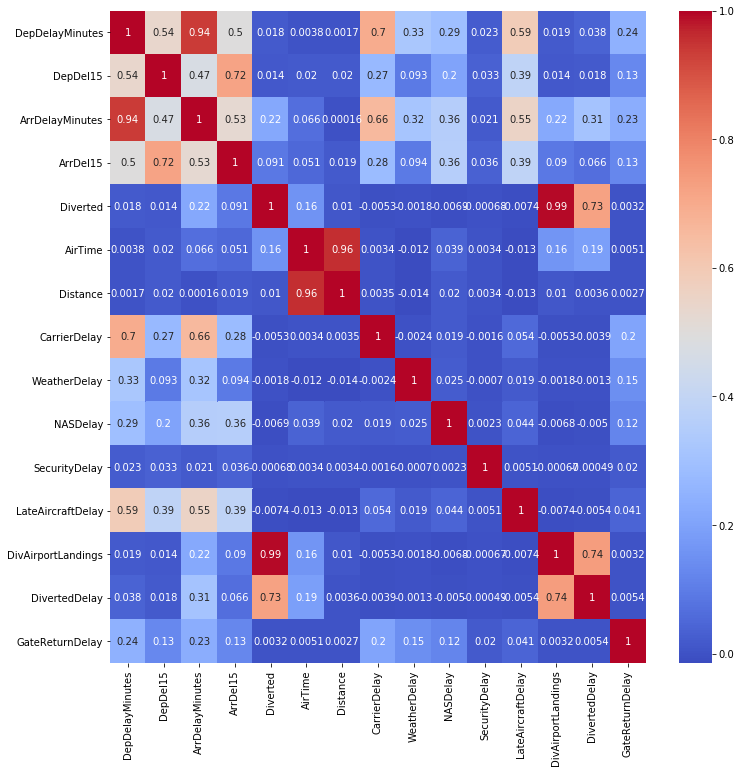

In [35]:
fig = plt.figure(figsize=(12,12))
fig = sns.heatmap(
    df.select_dtypes(exclude='object').drop(columns=['DayOfWeek', 'DepHour']).corr(),
    annot=True,
    cmap='coolwarm'
);

The features concerning diverted flights are redundant. Thus the features DivAirportLandings and Diverted will be dropped.

In [116]:
df = df.drop(columns=['DivAirportLandings', 'Diverted'])

#### Further explore pairwise patterns between metric predictors and target variable

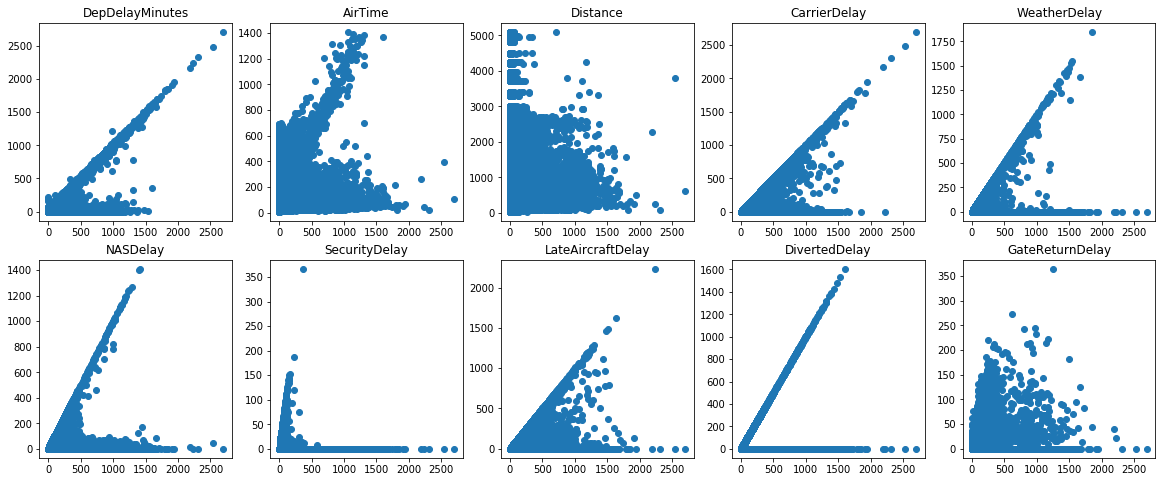

In [37]:
fig, axes = plt.subplots(2, 5, figsize=(20,8))
cols = []
for col in df.select_dtypes(exclude='object').drop(columns=['ArrDelayMinutes', 'ArrDel15', 'DayOfWeek', 'DepHour', 'DepDel15']):
    cols.append(col)
for ax, col in zip(axes.reshape(10), cols):
    ax.scatter(df['ArrDelayMinutes'], df[col])
    ax.set_title(col)

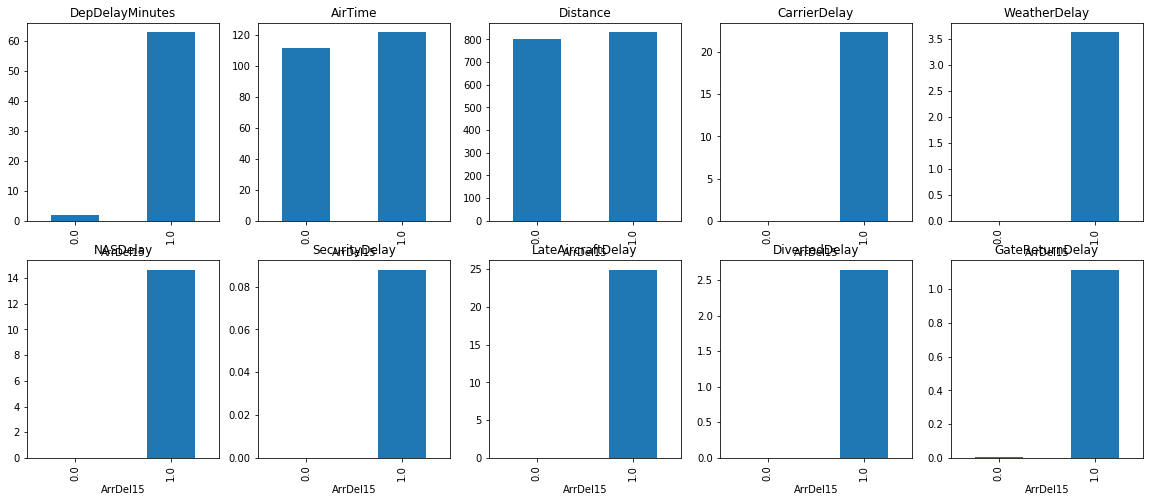

In [38]:
fig, axes = plt.subplots(2, 5, figsize=(20,8))
cols = []
for col in df.select_dtypes(exclude='object').drop(columns=['ArrDelayMinutes', 'ArrDel15', 'DayOfWeek', 'DepHour', 'DepDel15']):
    cols.append(col)
for ax, col in zip(axes.reshape(10), cols):
    df[col].groupby(df['ArrDel15']).mean().plot(ax=ax, kind='bar')
    ax.set_title(col)

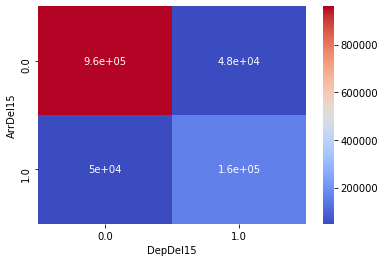

In [39]:
confusion_matrix = pd.crosstab(df['ArrDel15'], df['DepDel15'], rownames=['ArrDel15'], colnames=['DepDel15'])
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm');

Of the around 210000 flights with departure delay 4/5 are also late on arrival.

In [110]:
((df['ArrDelayMinutes']-(df['WeatherDelay']+df['LateAircraftDelay']+df['NASDelay']+df['CarrierDelay']+df['SecurityDelay']))!=0).sum()

182051

In [108]:
df[((df['ArrDelayMinutes']-(df['WeatherDelay']+df['LateAircraftDelay']+df['NASDelay']+df['CarrierDelay']+df['SecurityDelay']))!=0)].head(15)

,DayOfWeek,Reporting_Airline,Origin,Dest,DepDelayMinutes,DepDel15,ArrDelayMinutes,ArrDel15,Diverted,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,DivertedDelay,GateReturnDelay,DepHour
14,1,AA,AUS,DFW,4.0,0.0,2.0,0.0,0.0,40.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
19,6,AA,AUS,DFW,0.0,0.0,12.0,0.0,0.0,43.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
25,5,AA,AUS,DFW,0.0,0.0,2.0,0.0,0.0,47.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
35,5,AA,DFW,AUS,0.0,0.0,4.0,0.0,0.0,41.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
45,1,AA,DFW,AUS,1.0,0.0,9.0,0.0,0.0,42.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
58,7,AA,DFW,AUS,10.0,0.0,6.0,0.0,0.0,46.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
60,2,AA,DFW,AUS,0.0,0.0,3.0,0.0,0.0,40.0,190.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
63,5,AA,CLE,CLT,0.0,0.0,3.0,0.0,0.0,77.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
66,1,AA,CLE,CLT,16.0,1.0,4.0,0.0,0.0,75.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
71,1,AA,CLE,CLT,20.0,1.0,1.0,0.0,0.0,68.0,430.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19


The time information on delay causes mostly sums up to the arrival delay. This is only then not the case when there is a very low arrival delay. Thus all the time information on delay causes are components of arrival delay and no real predictors.

#### Check relevance of time related patterns

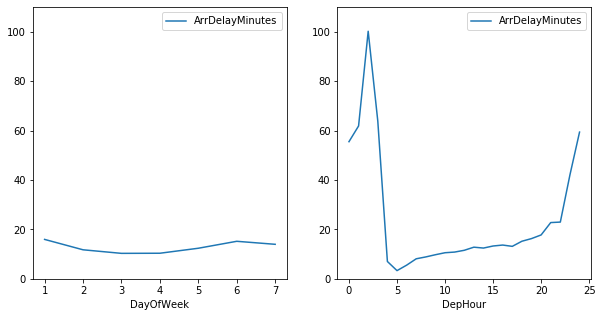

In [40]:
cols = ['DayOfWeek', 'DepHour']
fig, axes = plt.subplots(1, 2, figsize=(10,5))
for ax, col in zip(axes, cols):
    df[['ArrDelayMinutes']].groupby(df[col]).mean().plot(ax=ax)
    ax.set_ylim(0, 110);

There is an apparent influence of DepHour on arrival delay. The influence of DayOfWeek seems to be weak.

#### Check relevance of discrete features with Cramers V (effect size of chi2): Reporting_Airline, Origin, Dest, DayOfWeek, DepHour

In [41]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = df.shape[0]
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [42]:
features = ['Reporting_Airline', 'Origin', 'Dest', 'DayOfWeek', 'DepHour']
for feature in features:
    contingency=pd.crosstab(df['ArrDel15'], df[feature])
    cv = cramers_stat(contingency)
    print(feature + ': ' + 'Cramers V = ', cv)

Reporting_Airline: Cramers V =  0.08342765822099128
Origin: Cramers V =  0.08430588635875946
Dest: Cramers V =  0.09179155711793514
DayOfWeek: Cramers V =  0.06153014598613604
DepHour: Cramers V =  0.17325538144367975


There are no strong influences of the discrete features on arrival delay. The highest effect size is apparent for DepHour.

In [43]:
df['Reporting_Airline'].nunique(), df['Origin'].nunique(), df['Dest'].nunique()

(17, 352, 352)

Origin, Dest, Reporting_Airline and DayOfWeek are no strong predictors and will not be included as predictors. The feature DepHour will be included with One-Hot-Encoding.

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [111]:
df = df.reset_index()

In [112]:
onehotencoder_dh = OneHotEncoder()
ohe_dh = onehotencoder_dh.fit_transform(df['DepHour'][:, np.newaxis])
ohe_dh_df = pd.DataFrame(ohe_dh.toarray(), columns=onehotencoder_dh.get_feature_names())

In [113]:
index_raw=list(np.arange(0,df.shape[0], 1))
df['id']=index_raw
ohe_dh_df['id']=index_raw
df = df.merge(ohe_dh_df, on='id')

In [114]:
df = df.drop(columns=['index', 'DayOfWeek', 'DepHour', 'Reporting_Airline', 'Origin', 'Dest', 'ArrDelayMinutes', 'id', 'DepDel15'])

In [115]:
df.shape

(1219989, 38)

#### Conclusion data exploration

- There are strong influences of certain features on arrival delay: DepDelayMinutes, all the time information on delay causes
- As the features on time information on delay causes are mere components of arrival delay, not predictors, these will be dropped.
- The distribution of the target variable ArrDel15 is unbalanced with 82.5% of the flights being on time. Thus the prediction performance of an algorithm for delayed flights must be well above this threshold. Predicting all flights as on time will already bring 82.5% accuracy.

In [120]:
df = df.drop(columns=['WeatherDelay', 'NASDelay', 'LateAircraftDelay', 'SecurityDelay', 'DivertedDelay', 'CarrierDelay', 'GateReturnDelay'])

In [141]:
df.shape

(1219989, 30)